# North/South
Terminal Passenger Distributions- This will be built out to look at the North and South entrance distributions, but it currently just a placeholder. 

In [2]:
%matplotlib inline

In [3]:
import athena
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# pulling from the database
db = athena.database.AthenaDatabase(cache=True)

flights = db.flight_passengers()
control = db.control_plaza()

flights.index = flights.index.map(lambda x: x.tz_convert('US/Central').replace(tzinfo=None))
control.index = control.index.map(lambda x: x.tz_convert('US/Central').replace(tzinfo=None))

pickle.dump( flights, open( "flights.pkl", "wb" ) )
pickle.dump( control, open( "control.pkl", "wb" ) )

flights = pickle.load( open( "flights.pkl", "rb" ) )
control = pickle.load( open( "control.pkl", "rb" ) )

#We need to combine these into a single DataFrame.
tmp = flights.resample("30min").sum()
df = pd.concat([ control, tmp ], axis=1)
df.rename(columns={'count': 'y'}, inplace=True)
df.dropna(inplace=True)
df['terminal_passengers'] = df['num_seats']*0.8
df['passengers'] = df['terminal_passengers']*0.38

# add some features
df['time'] = df.index.map(lambda x: x.time())
df['hour'] = df.index.map(lambda x: x.hour)
df['day'] = df.index.map(lambda x: x.day)
df['month'] = df.index.map(lambda x: x.month)
df['year'] = df.index.map(lambda x: x.year)
df['weekday'] = df.index.map(lambda x: x.weekday())

df = df.reset_index()

In [5]:
df

,period,y,num_seats,terminal_passengers,passengers,time,hour,day,month,year,weekday
0,2016-10-01 00:00:00,372.0,1047.0,837.6,318.288,00:00:00,0,1,10,2016,5
1,2016-10-01 00:30:00,196.0,294.0,235.2,89.376,00:30:00,0,1,10,2016,5
2,2016-10-01 01:00:00,103.0,0.0,0.0,0.000,01:00:00,1,1,10,2016,5
3,2016-10-01 01:30:00,47.0,0.0,0.0,0.000,01:30:00,1,1,10,2016,5
4,2016-10-01 02:00:00,36.0,0.0,0.0,0.000,02:00:00,2,1,10,2016,5
...,...,...,...,...,...,...,...,...,...,...,...
34947,2018-09-29 08:30:00,871.0,8982.0,7185.6,2730.528,08:30:00,8,29,9,2018,5
34948,2018-09-29 09:00:00,1097.0,13813.0,11050.4,4199.152,09:00:00,9,29,9,2018,5
34949,2018-09-29 09:30:00,1032.0,3537.0,2829.6,1075.248,09:30:00,9,29,9,2018,5
34950,2018-09-29 10:00:00,854.0,5816.0,4652.8,1768.064,10:00:00,10,29,9,2018,5


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text xticklabel objects>)

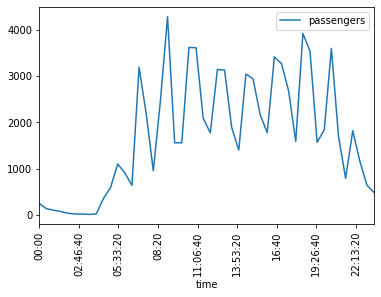

In [30]:
df.pivot_table(index='time', values='passengers').mean(axis=1, level=0).plot()
plt.xticks(fontsize=10, rotation=90)

Mean of passengers throughout day

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text xticklabel objects>)

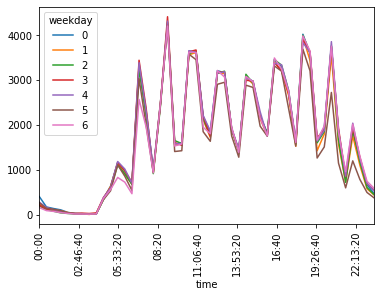

In [29]:
df.pivot_table(index='time', columns=['weekday'], values='passengers').mean(axis=1, level=0).plot()
plt.xticks(fontsize=10, rotation=90)

Mean of passengers throughout day by weekday